# 물체 탐지(Object detection) - YOLO Keras

DarkNet의 모델을 Keras로 변환하여 물체 탐지 실행.

https://github.com/qqwweee/keras-yolo3


## 프로젝트 다운로드


In [4]:
%cd /content

!rm -rf keras-yolo3

!git clone https://github.com/qqwweee/keras-yolo3


/content
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 150.95 KiB | 232.00 KiB/s, done.
Resolving deltas: 100% (65/65), done.


## YOLO3 모델 다운로드


In [5]:
%cd /content/keras-yolo3
!wget wget https://pjreddie.com/media/files/yolov3.weights

/content/keras-yolo3
--2019-08-06 18:29:26--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2019-08-06 18:29:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  17.2MB/s    in 14s     

2019-08-06 18:29:41 (16.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

FINISHED --2019-08-06 18:29:41--
Total wall clock time: 15s
Downloaded: 1 files, 237M in 14s (16.7 MB/s)


## 모델 파일 변환

DarkNet의 모델파일을 Keras에서 사용할 수 있는 모델 파일로 변환한다.


- convert.py : 변환 실행 파일
- yolov3.cfg : Darknet에서 사용하는 모델 구조 정의 파일
- yolov3.weight : Darknet으로 학습된 모델 파일

실행 결과로 다음의 h5 파일로 변환된다. 
- yolov3.h5 : 변환된 모델 파일


In [6]:
!head -40 yolov3.cfg 

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1


In [7]:
# 실행하기전 기존것이 있다면 삭제
!rm -rf yolov3.h5

# 실행 
%run convert.py yolov3.cfg yolov3.weights yolov3.h5

Using TensorFlow backend.
W0806 18:29:53.168065 140141628086144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 18:29:53.209954 140141628086144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 18:29:53.218184 140141628086144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 18:29:53.238183 140141628086144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0806 

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)


W0806 18:29:56.806325 140141628086144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsing section convolutional_12
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_13
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_4
Parsing section convolution

W0806 18:30:53.670723 140141628086144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



Parsing section upsample_0
Parsing section route_1
Concatenating route layers: [<tf.Tensor 'up_sampling2d_1/ResizeNearestNeighbor:0' shape=(?, ?, ?, 256) dtype=float32>, <tf.Tensor 'add_19/add:0' shape=(?, ?, ?, 512) dtype=float32>]
Parsing section convolutional_60
conv2d bn leaky (1, 1, 768, 256)
Parsing section convolutional_61
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_62
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_63
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_64
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_65
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_66
conv2d    linear (1, 1, 512, 255)
Parsing section yolo_1
Parsing section route_2
Parsing section convolutional_67
conv2d bn leaky (1, 1, 256, 128)
Parsing section upsample_1
Parsing section route_3
Concatenating route layers: [<tf.Tensor 'up_sampling2d_2/ResizeNearestNeighbor:0' shape=(?, ?, ?, 128) dtype=float32>, <tf.Tensor 'add_11/ad

## 물체 탐지 실행

다음의 파일이 사용된다.
- yolov3.h5 : 모델 파일
- model_data/coco_classes.txt : 클래스 이름


--2019-08-06 18:31:26--  http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg
Resolving beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)... 94.31.29.96
Connecting to beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)|94.31.29.96|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89406 (87K) [image/jpeg]
Saving to: ‘street_view.jpg’

street_view.jpg     100%[===================>]  87.31K   271KB/s    in 0.3s    

2019-08-06 18:31:26 (271 KB/s) - ‘street_view.jpg’ saved [89406/89406]



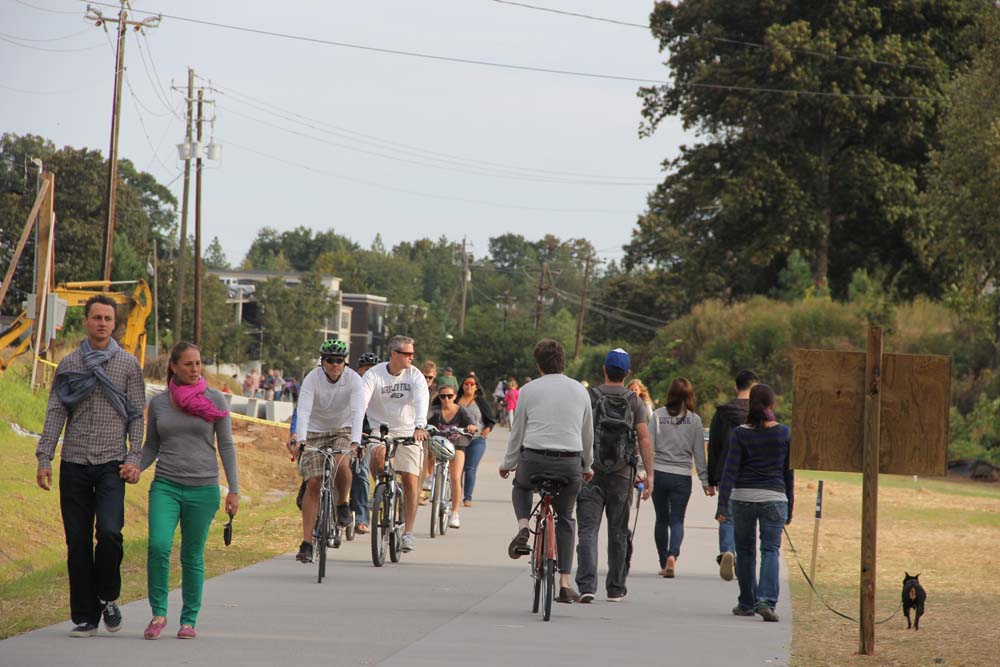

In [8]:
!wget -O street_view.jpg http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg

from IPython.display import Image, display
display(Image(filename='street_view.jpg')) 

In [9]:
!cat model_data/coco_classes.txt

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


In [0]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO

def do_object_detection(file, model_path, class_path):
  
  yolo = YOLO(model_path=model_path, classes_path=class_path)

  image = Image.open(file)
  result_image = yolo.detect_image(image)

  display(result_image)


yolov3.h5 model, anchors, and classes loaded.


W0806 18:31:46.670050 140141628086144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


(416, 416, 3)
Found 20 boxes for img
dog 0.91 (900, 571) (929, 631)
bicycle 0.54 (433, 439) (461, 527)
bicycle 0.69 (425, 451) (449, 537)
bicycle 0.85 (368, 438) (421, 567)
bicycle 0.95 (297, 438) (352, 574)
bicycle 0.99 (519, 478) (575, 617)
person 0.34 (495, 365) (545, 564)
person 0.54 (252, 368) (269, 403)
person 0.55 (270, 369) (286, 401)
person 0.71 (501, 376) (518, 423)
person 0.89 (455, 371) (489, 515)
person 0.96 (429, 377) (482, 510)
person 0.99 (290, 335) (370, 547)
person 0.99 (572, 353) (650, 599)
person 0.99 (358, 335) (437, 536)
person 1.00 (129, 341) (239, 645)
person 1.00 (719, 387) (793, 620)
person 1.00 (501, 338) (591, 600)
person 1.00 (645, 378) (708, 583)
person 1.00 (30, 298) (145, 638)
7.165401360000033


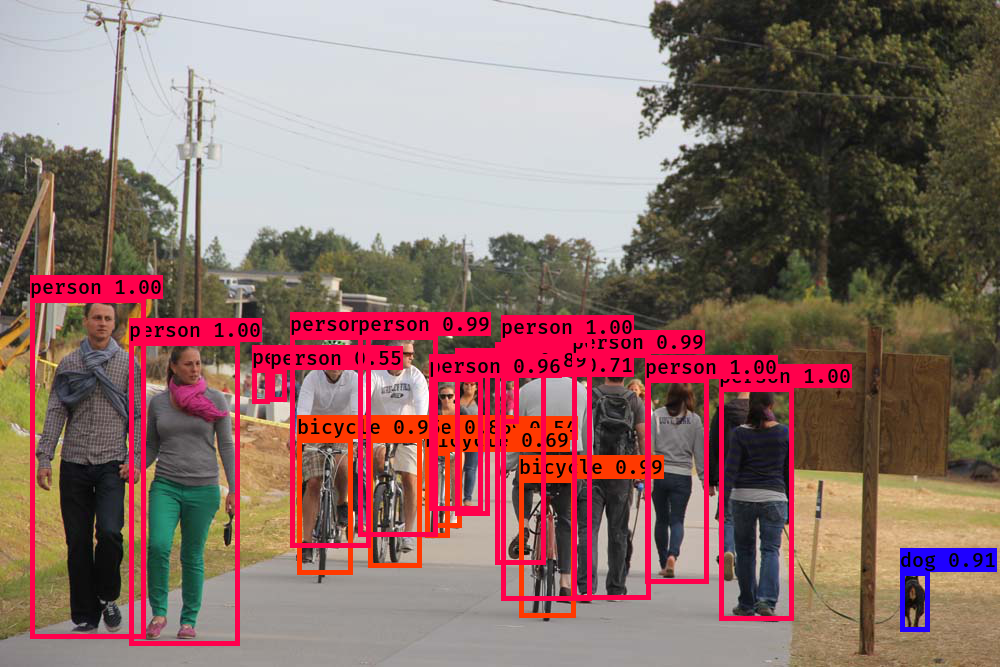

In [11]:
do_object_detection('street_view.jpg', 'yolov3.h5', 'model_data/coco_classes.txt')



# 커스텀 데이터 학습


## 커스터 데이터 다운로드

standford dogs 데이터셋 중 10개 클래스만 추린 데이타

In [12]:
%cd /content/keras-yolo3

!rm -rf dogs.tar.gz

!wget https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz


/content/keras-yolo3
--2019-08-06 18:32:07--  https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz
Resolving github.com (github.com)... 13.229.188.59
Connecting to github.com (github.com)|13.229.188.59|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz [following]
--2019-08-06 18:32:08--  https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62885106 (60M) [application/octet-stream]
Saving to: ‘dogs.tar.gz’

In [14]:
%cd /content/keras-yolo3

!rm -rf dogs

!tar xfz dogs.tar.gz

!ls -al dogs | head -10

/content/keras-yolo3
total 128
drwxr-xr-x 12  501 staff  4096 Jul 23 15:49 .
drwxr-xr-x  8 root root   4096 Aug  6 18:33 ..
drwxr-xr-x  2  501 staff 12288 Aug  6 18:33 n02085620-Chihuahua
drwxr-xr-x  2  501 staff 12288 Aug  6 18:33 n02085782-Japanese_spaniel
drwxr-xr-x  2  501 staff 12288 Aug  6 18:33 n02085936-Maltese_dog
drwxr-xr-x  2  501 staff 12288 Aug  6 18:33 n02086079-Pekinese
drwxr-xr-x  2  501 staff 12288 Aug  6 18:33 n02086240-Shih-Tzu
drwxr-xr-x  2  501 staff 12288 Aug  6 18:33 n02086646-Blenheim_spaniel
drwxr-xr-x  2  501 staff 12288 Aug  6 18:33 n02086910-papillon


## 데이터 준비

2개의 파일

- 클래스 파일
- 레이블링 파일

그리고 이미지 파일들

### 클래스 파일 생성

dogs 밑의 디렉토리 이름들이 클래스 이름이다.

이를 가지고 dogs_classes.txt를 생성한다.

In [38]:
!ls -al dogs | grep -v total | grep -v \\. | cut -c 45- > dogs_classes.txt
!cat dogs_classes.txt

n02085620-Chihuahua
n02085782-Japanese_spaniel
n02085936-Maltese_dog
n02086079-Pekinese
n02086240-Shih-Tzu
n02086646-Blenheim_spaniel
n02086910-papillon
n02087046-toy_terrier
n02087394-Rhodesian_ridgeback
n02088094-Afghan_hound


### 레이블링 파일 생성

본 예제의 경우 전부 강아지 이미지이다.

실제 YOLO를 호출하여 강아지를 탐지하고, 그 정보를 사용하여 레이블링 파일을 생성한다.

dogs_annotation.txt가 생성된다.

```
dogs/n02086240-Shih-Tzu/n02086240_8825.jpg 97,46,436,375,0
dogs/n02086240-Shih-Tzu/n02086240_4608.jpg 0,100,496,371,0
dogs/n02086240-Shih-Tzu/n02086240_1779.jpg 213,114,361,331,0
dogs/n02086240-Shih-Tzu/n02086240_5352.jpg 0,57,378,375,0
dogs/n02086240-Shih-Tzu/n02086240_9098.jpg 156,9,348,375,0
```

실제로는 이러한 방법이 아닌 수작업에 의해 레이블링 데이터를 생성한다.

In [0]:
yolo = YOLO(model_path='yolov3.h5', classes_path='model_data/coco_classes.txt')


In [86]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO
from yolo3.utils import letterbox_image
import colorsys
import os
from timeit import default_timer as timer

import numpy as np
from keras import backend as K
from keras.models import load_model
from keras.layers import Input
from PIL import Image, ImageFont, ImageDraw

from yolo3.model import yolo_eval, yolo_body, tiny_yolo_body
from yolo3.utils import letterbox_image
import os
from keras.utils import multi_gpu_model


SHOW_DETECTED_IMAGE = False


# 1개 이미지에 대하여 실제 yolo를 사용하여 물체를 탐지하고 box, score, class를 반환한다.
def get_detected_box_values(yolo, image_file_name):
  # copy and modified from yolo.py detect_image()
  image = Image.open(image_file_name)

  if yolo.model_image_size != (None, None):
      assert yolo.model_image_size[0]%32 == 0, 'Multiples of 32 required'
      assert yolo.model_image_size[1]%32 == 0, 'Multiples of 32 required'
      boxed_image = letterbox_image(image, tuple(reversed(yolo.model_image_size)))
  else:
      new_image_size = (image.width - (image.width % 32),
                        image.height - (image.height % 32))
      boxed_image = letterbox_image(image, new_image_size)
  image_data = np.array(boxed_image, dtype='float32')

  image_data /= 255.
  image_data = np.expand_dims(image_data, 0)  # Add batch dimension.

  out_boxes, out_scores, out_classes = yolo.sess.run(
      [yolo.boxes, yolo.scores, yolo.classes],
      feed_dict={
          yolo.yolo_model.input: image_data,
          yolo.input_image_shape: [image.size[1], image.size[0]],
          K.learning_phase(): 0
      })

  return out_boxes, out_scores, out_classes

def build_box_value(box, class_id):

  top, left, bottom, right = box
  top = max(0, np.floor(top + 0.5).astype('int32'))
  left = max(0, np.floor(left + 0.5).astype('int32'))
  bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
  right = min(image.size[0], np.floor(right + 0.5).astype('int32'))  

  # x_min,y_min,x_max,y_max,class_id
  return "{},{},{},{},{}".format(left,top,right,bottom,class_id)

# 1개 이미지에 대하여 실제 yolo를 사용하여 강아지의 물체 탐지하고, box 정보를 반환한다.
def get_dog_detected_box_values(yolo, image_file_name, new_class_id):

  boxes, scores, classes = get_detected_box_values(yolo, image_file_name)

  DOG_CLASS_INDEX = 16 # from coco_classes.txt
  box_values = []
  for i in range(len(classes)):
    if scores[i] < 0.5: continue
    if classes[i] != DOG_CLASS_INDEX: continue
    box_values.append(build_box_value(boxes[i], new_class_id))

  # return [97,46,436,375]
  return box_values

# 1개 이미지에 대하여 실제 yolo를 사용하여 강아지의 물체탐지를 하고, 학습을 위한 annotation 문자열을 반환한다.
def get_labeling(yolo, image_file_name, new_class_id):
  box_values = get_dog_detected_box_values(yolo, image_file_name, new_class_id)

  # image_file_name = 'dogs/n02086240-Shih-Tzu/n02086240_8825.jpg'
  # new_class_id = 0
  # return 'dogs/n02086240-Shih-Tzu/n02086240_8825.jpg 97,46,436,375,0'
  return image_file_name+" "+" ".join(box_values)


# path 밑의 파일이름 리스트와 sub dir에 의한 class id 리스트를 반환한다.
def get_file_names_and_class_ids(path):
  file_names = []
  class_ids = []

  sub_dirs = os.listdir(path)

  for i in range(len(sub_dirs)):
    class_id = i
    image_file_names = os.listdir(path+"/"+sub_dirs[i])
    for image_file_name in image_file_names:
      file_names.append(path+"/"+sub_dirs[i]+"/"+image_file_name)
      class_ids.append(class_id)

  # file_names = [
  #   'dogs/n02086240-Shih-Tzu/n02086240_8825.jpg', 
  #   'dogs/n02086240-Shih-Tzu/n02086240_4608.jpg',
  #   ...
  #  ]
  # class_ids = [ 0, 0, ... ]
  return file_names, class_ids



file_names, class_ids = get_file_names_and_class_ids("dogs")

labelings = []
for i in range(len(file_names)):
  print(i,file_names[i])
  file = file_names[i]
  class_id = class_ids[i]  
  labelings.append(get_labeling(yolo, file, class_id))

  if SHOW_DETECTED_IMAGE:
    image = Image.open(file)
    result_image = yolo.detect_image(image)
    display(result_image)

# dogs/n02086240-Shih-Tzu/n02086240_8825.jpg 97,46,436,375,0
# dogs/n02086240-Shih-Tzu/n02086240_4608.jpg 0,100,467,371,0
# dogs/n02086240-Shih-Tzu/n02086240_1779.jpg 213,114,361,331,0
# dogs/n02086240-Shih-Tzu/n02086240_5352.jpg 0,57,378,375,0
# dogs/n02086240-Shih-Tzu/n02086240_9098.jpg 156,9,348,378,0
# print("\n".join(labelings))


f = open("dogs_annotations.txt", 'w')
f.write("\n".join(labelings))
f.close()




0 dogs/n02086240-Shih-Tzu/n02086240_8825.jpg
1 dogs/n02086240-Shih-Tzu/n02086240_4608.jpg
2 dogs/n02086240-Shih-Tzu/n02086240_1779.jpg
3 dogs/n02086240-Shih-Tzu/n02086240_5352.jpg
4 dogs/n02086240-Shih-Tzu/n02086240_9098.jpg
5 dogs/n02086240-Shih-Tzu/n02086240_963.jpg
6 dogs/n02086240-Shih-Tzu/n02086240_5541.jpg
7 dogs/n02086240-Shih-Tzu/n02086240_7100.jpg
8 dogs/n02086240-Shih-Tzu/n02086240_4629.jpg
9 dogs/n02086240-Shih-Tzu/n02086240_1958.jpg
10 dogs/n02086240-Shih-Tzu/n02086240_739.jpg
11 dogs/n02086240-Shih-Tzu/n02086240_5994.jpg
12 dogs/n02086240-Shih-Tzu/n02086240_5316.jpg
13 dogs/n02086240-Shih-Tzu/n02086240_11959.jpg
14 dogs/n02086240-Shih-Tzu/n02086240_1843.jpg
15 dogs/n02086240-Shih-Tzu/n02086240_6898.jpg
16 dogs/n02086240-Shih-Tzu/n02086240_1205.jpg
17 dogs/n02086240-Shih-Tzu/n02086240_12342.jpg
18 dogs/n02086240-Shih-Tzu/n02086240_1927.jpg
19 dogs/n02086240-Shih-Tzu/n02086240_9467.jpg
20 dogs/n02086240-Shih-Tzu/n02086240_126.jpg
21 dogs/n02086240-Shih-Tzu/n02086240_5536.jpg

In [85]:
!wc dogs_annotations.txt
!head -10 dogs_annotations.txt

  1918   3934 122601 dogs_annotations.txt
dogs/n02086240-Shih-Tzu/n02086240_8825.jpg 97,46,436,375,0
dogs/n02086240-Shih-Tzu/n02086240_4608.jpg 0,100,496,371,0
dogs/n02086240-Shih-Tzu/n02086240_1779.jpg 213,114,361,331,0
dogs/n02086240-Shih-Tzu/n02086240_5352.jpg 0,57,378,375,0
dogs/n02086240-Shih-Tzu/n02086240_9098.jpg 156,9,348,375,0
dogs/n02086240-Shih-Tzu/n02086240_963.jpg 0,8,338,375,0
dogs/n02086240-Shih-Tzu/n02086240_5541.jpg 63,105,345,284,0
dogs/n02086240-Shih-Tzu/n02086240_7100.jpg 6,23,372,375,0
dogs/n02086240-Shih-Tzu/n02086240_4629.jpg 32,57,451,373,0
dogs/n02086240-Shih-Tzu/n02086240_1958.jpg 43,16,390,375,0


## 학습 실행

학습에 필요한 파일은 3개이다.

- 클래스 파일
- 레이블링 파일
- 기반 학습 모델




그런데 2019/08/07 현재 이 파일 이름들은 train.py안에 하드코딩 되어있다.
- 클래스 파일 : model_data/voc_classes.txt
- 레이블링 파일 : train.txt
- 기반 학습 모델 : model_data/yolo_weights.h5

하드 코딩된 바 데로 이를음 변경하고 실행한다.



In [92]:
![ ! -f model_data/voc_classes.txt.org ] && mv model_data/voc_classes.txt model_data/voc_classes.txt.org
![ ! -f train.txt.org ] && mv train.txt train.txt.org
![ ! -f model_data/yolo_wieghts.org ] && mv model_data/yolo_weights.h5 model_data/yolo_wieghts.h5.org

![ ! -f model_data/voc_classes.txt ] && cp dogs_classes.txt model_data/voc_classes.txt
![ ! -f train.txt ] && cp dogs_annotations.txt train.txt
![ ! -f model_data/yolo_weights.h5 ] && cp yolov3.h5 model_data/yolo_weights.h5


mv: cannot stat 'model_data/yolo_weights.h5': No such file or directory


In [91]:
!ls -al *.txt

-rw-r--r-- 1 root root 122601 Aug  6 20:33 dogs_annotations.txt
-rw-r--r-- 1 root root    228 Aug  6 18:44 dogs_classes.txt


In [93]:
!python3 train.py

Using TensorFlow backend.
W0806 20:44:08.706888 139875781281664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0806 20:44:08.707202 139875781281664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0806 20:44:08.720846 139875781281664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 20:44:08.721091 139875781281664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.